In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


In [2]:
df=pd.read_csv('Bank.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
blank_total_charges = df[df['TotalCharges'] == ' ']

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [7]:
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df2=df.copy()

In [12]:
df2.describe(include=object)


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [17]:
for column in df2.select_dtypes(include="object").columns:
    print(df[column].value_counts())
    print("***"*10)

gender
Male      3555
Female    3488
Name: count, dtype: int64
******************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
******************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
******************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
******************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
******************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
******************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
******************************
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
******************************
DeviceProtection
No                     30

In [14]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Analysis

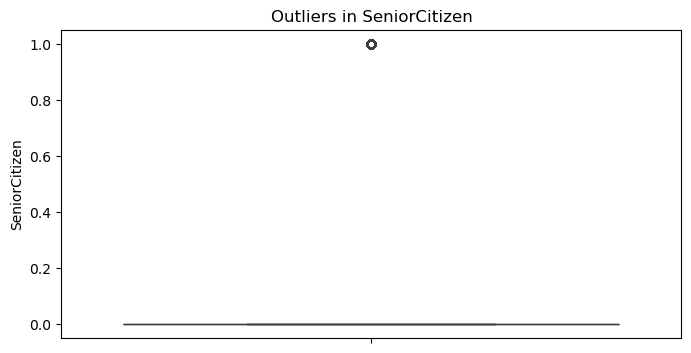

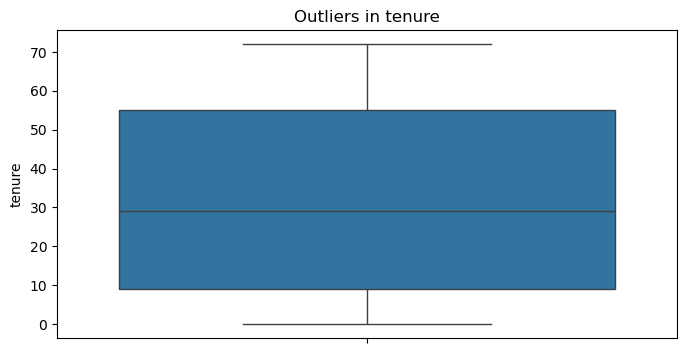

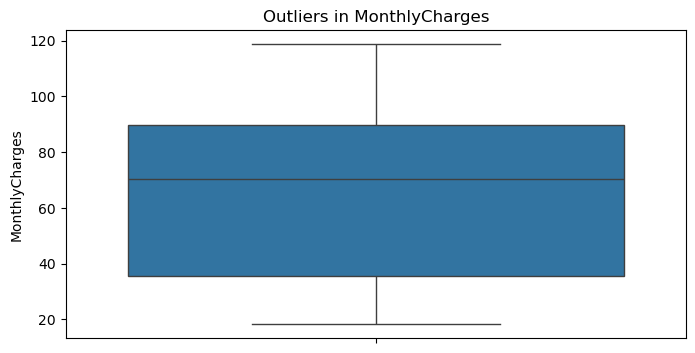

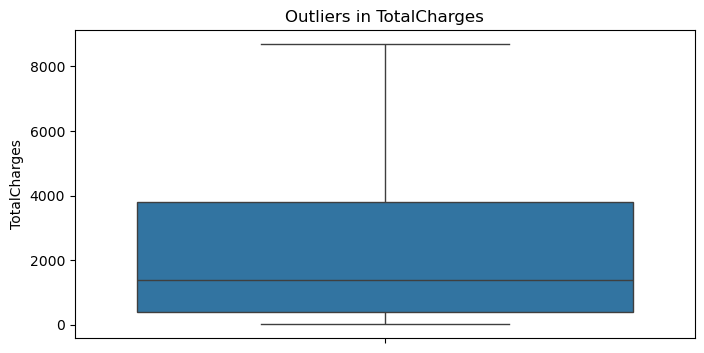

In [16]:
for col in df2.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f'Outliers in {col}')
    plt.show()

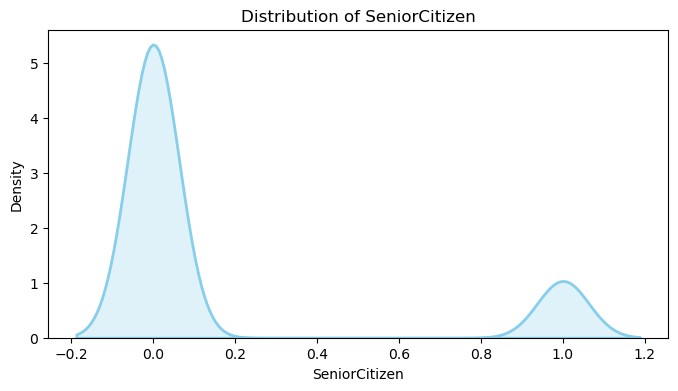

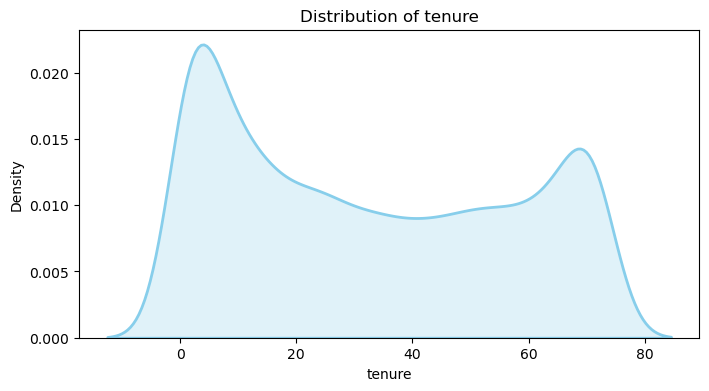

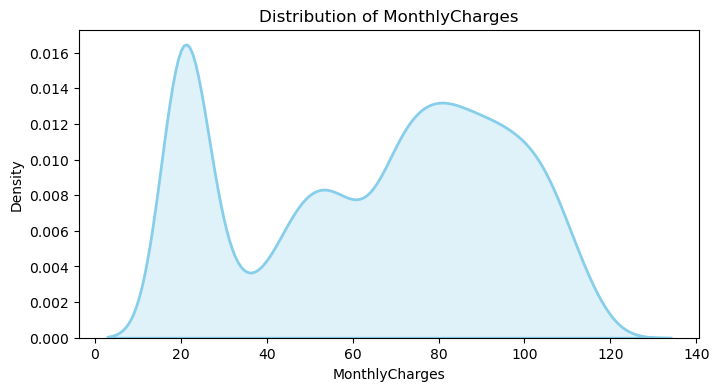

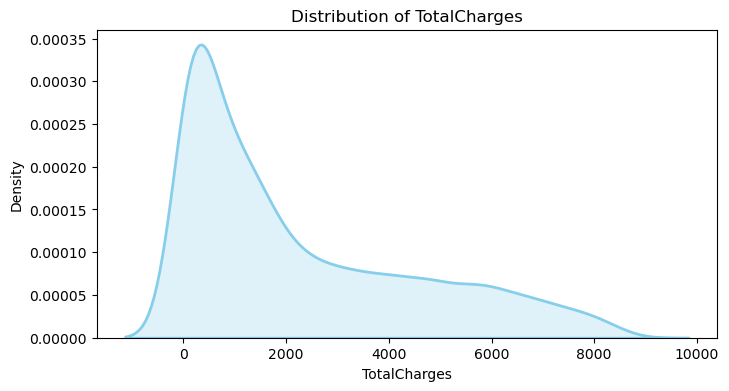

In [19]:
for col in df2.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True, color="skyblue", linewidth=2)
    plt.title(f'Distribution of {col}')
    plt.show()

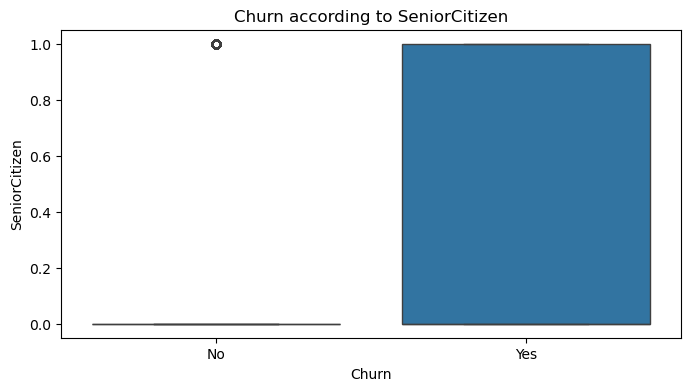

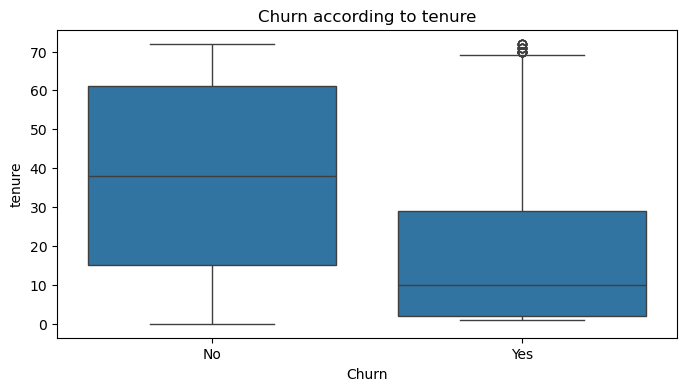

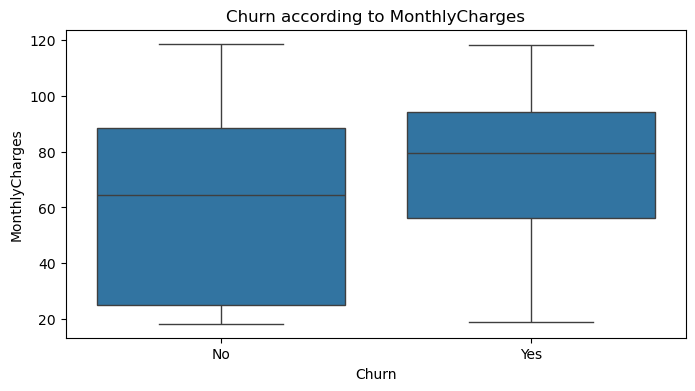

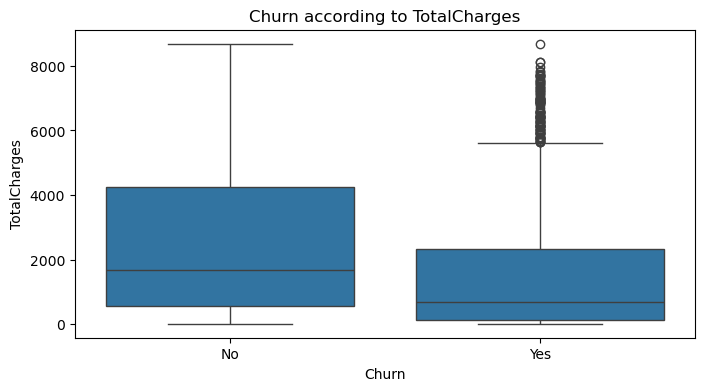

In [20]:
for col in df2.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Churn according to {col}')
    plt.show()

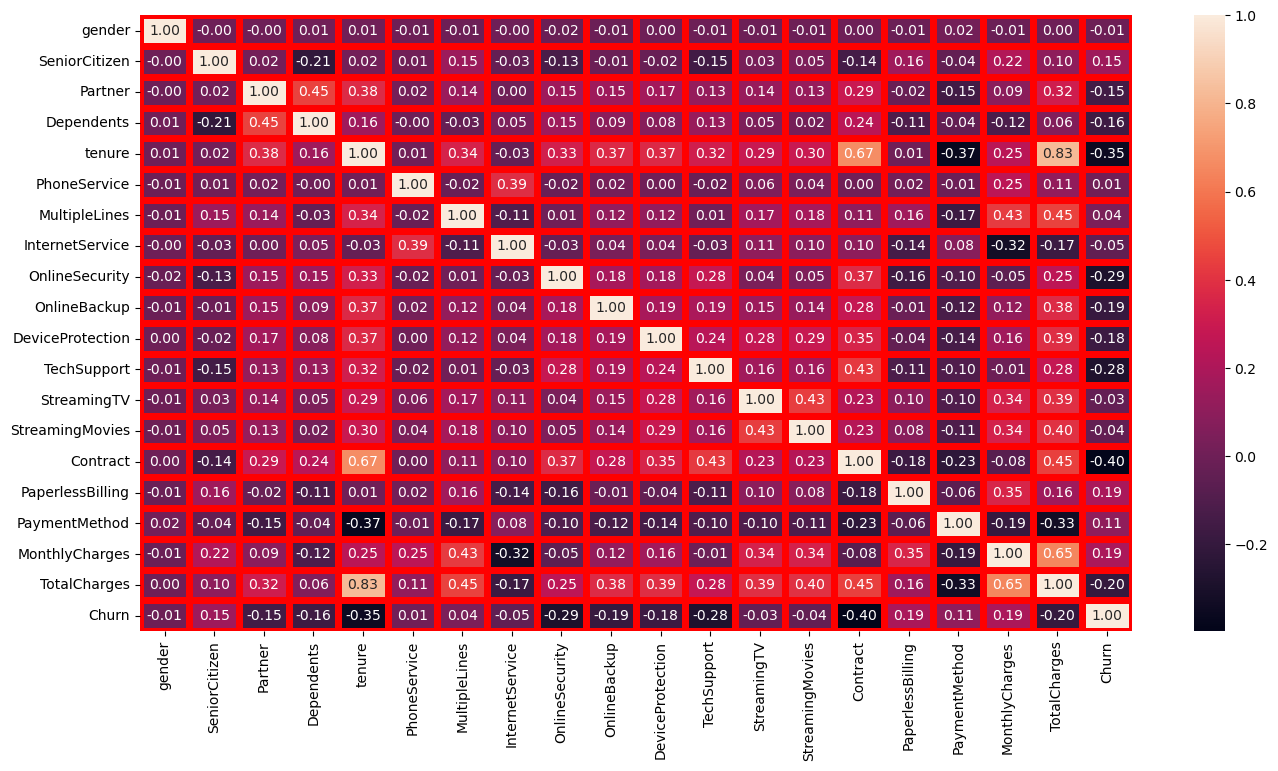

In [30]:
plt.figure(figsize = (16, 8))
sns.heatmap(df2.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 10}, linewidth = 5, linecolor = 'red')
plt.show()

In [31]:
df2.corr()['Churn'].sort_values(ascending=False) 

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.198362
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

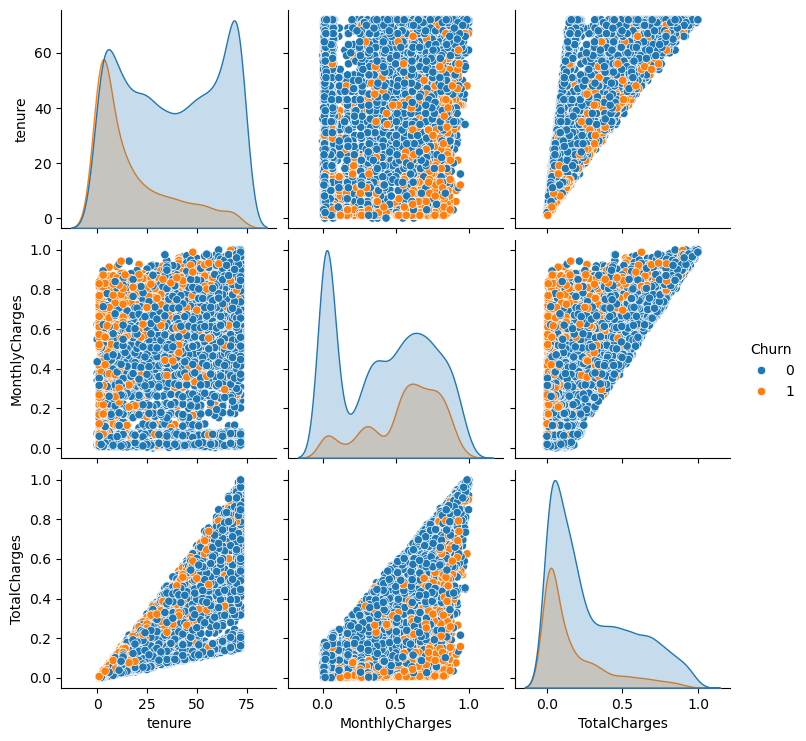

In [32]:
numerical_columns=['tenure','MonthlyCharges', 'TotalCharges']
sns.pairplot(df2, hue='Churn', vars=numerical_columns)
plt.show()

In [ ]:
df2.drop(['customerID'],axis=1,inplace=True)

In [ ]:
df2.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
df2.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df2.duplicated().sum()

22

In [24]:
df2=df2.drop_duplicates()

In [25]:
df2.duplicated().sum()

0

In [26]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
columns_to_encode = df2.select_dtypes(exclude=['number'])
for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df2[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df2[['MonthlyCharges', 'TotalCharges']])


In [26]:
X = df2[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
y = df2[['Churn']]

In [27]:
import tensorflow as tf
import keras

In [63]:

KerasModel=keras.models.Sequential([
            keras.layers.Dense(8,activation='relu'),
            keras.layers.Dense(64, activation = 'relu'),
            keras.layers.Dense(32, activation = 'relu'),
           
            keras.layers.Dense(1, activation = 'sigmoid')
])

In [64]:
MyOptimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW")

In [65]:
KerasModel.compile(optimizer ='SGD',loss='binary_crossentropy',metrics=['accuracy']) 


In [77]:
history = KerasModel.fit(Xr_train,yr_train,
                         validation_data=(Xr_test, yr_test),
                         epochs=500,
                         batch_size=5,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)])


Epoch 1/500
1064/1064 [==============================] - 4s 4ms/step - loss: 0.2349 - accuracy: 0.9023 - val_loss: 0.2533 - val_accuracy: 0.8963
Epoch 2/500
1064/1064 [==============================] - 4s 4ms/step - loss: 0.2267 - accuracy: 0.9085 - val_loss: 0.2362 - val_accuracy: 0.9053
Epoch 3/500
1064/1064 [==============================] - 3s 3ms/step - loss: 0.2300 - accuracy: 0.9068 - val_loss: 0.2043 - val_accuracy: 0.9204
Epoch 4/500
1064/1064 [==============================] - 3s 3ms/step - loss: 0.2258 - accuracy: 0.9064 - val_loss: 0.2154 - val_accuracy: 0.9151
Epoch 5/500
1064/1064 [==============================] - 4s 4ms/step - loss: 0.2259 - accuracy: 0.9071 - val_loss: 0.2267 - val_accuracy: 0.9016
Epoch 6/500
1064/1064 [==============================] - 3s 3ms/step - loss: 0.2238 - accuracy: 0.9105 - val_loss: 0.2236 - val_accuracy: 0.9159
Epoch 7/500
1064/1064 [==============================] - 4s 3ms/step - loss: 0.2242 - accuracy: 0.9058 - val_loss: 0.2287 - val_ac

In [78]:
print(KerasModel.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 160       
                                                                 
 dense_20 (Dense)            (None, 64)                576       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2849 (11.13 KB)
Trainable params: 2849 (11.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [79]:
KerasModel.save('KerasModel.model')

INFO:tensorflow:Assets written to: KerasModel.model\assets


INFO:tensorflow:Assets written to: KerasModel.model\assets


In [75]:
NewKerasModel = keras.models.load_model('KerasModel.model')
y_pred = NewKerasModel.predict(Xr_test)

42/42 [==============================] - 0s 2ms/step


In [76]:

ModelLoss, ModelAccuracy = NewKerasModel.evaluate(Xr_test, yr_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


42/42 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9174
Model Loss is 0.20949354767799377
Model Accuracy is 0.9173553586006165


42/42 [==============================] - 1s 4ms/step


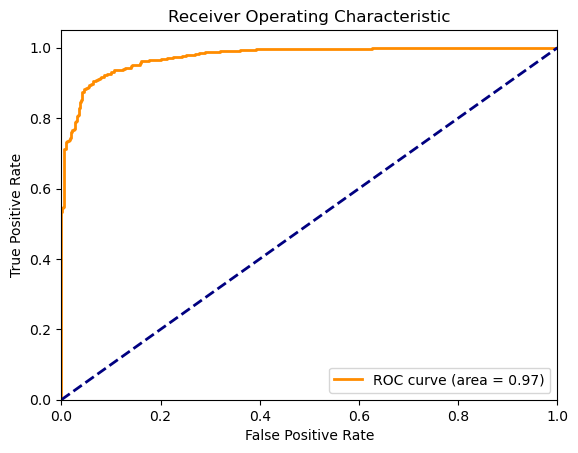

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y_pred_proba = NewKerasModel.predict(Xr_test)


fpr, tpr, thresholds = roc_curve(yr_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [30]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)






In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =2,weights='uniform')
classifier.fit(Xr_train, yr_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [46]:
y_predk = classifier.predict(Xr_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yr_test, y_predk)
print(cm)
accuracy_score(yr_test, y_predk)

[[540   9]
 [ 13 768]]


0.9834586466165414

In [57]:
('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),

(('K-Nearest Neighbors',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),)

In [137]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,class_weight='balanced',max_depth=15,random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=0)

In [138]:
from sklearn.ensemble import RandomForestClassifier
classifierr = RandomForestClassifier(max_depth=10,min_samples_split=15,random_state =0,class_weight='balanced')
classifierr.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=15, random_state=0)

In [139]:
y_predR = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predR)
print(cm)
accuracy_score(y_test, y_predR)

[[31  1]
 [ 1 37]]


0.9714285714285714

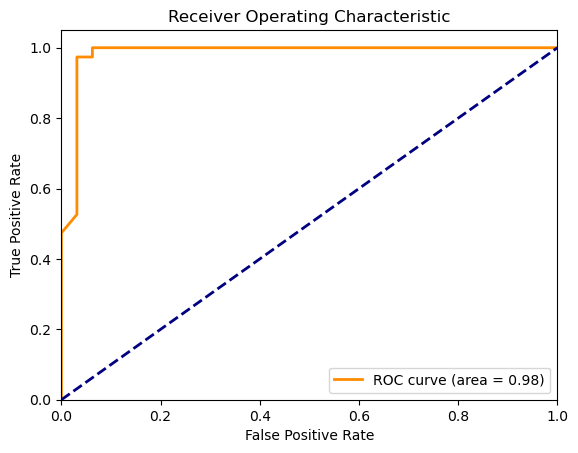

In [122]:
y_prob =classifier.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()